<a href="https://colab.research.google.com/github/ilexistools/kitconc-usage/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kitconc usage**

Kitconc is a free package for Corpus Linguistics and text analysis with Python.

It contains, among other things, tools for creating:

* Corpora;
* Frequency wordlists;
* Keywords;
* Concordance lines;
* Collocates;
* N-gram lists;
* Dispersion plots;
* Excel data files.

The package is built on top of platforms and packages for scientific research: numpy, nltk, pandas, xlsxwriter.

## **1. Install kitconc**

We can use *pip* to install it:

In [ ]:
!pip install kitconc

## **2. Import modules**

These are the main modules we are going to use:


In [2]:
from kitconc.kit_corpus import Corpora, Corpus


## **3. Create a corpus**

Here, we create a new corpus from raw texts:


In [5]:
# creates/sets a workspace folder
corpora = Corpora('workspace')

# downloads raw texts
url = 'https://github.com/ilexistools/kitconc-usage/raw/main/raw_ads.zip'
corpora.download_raw_texts(url) # unzips to 'ads' folder

# creates a new corpus from raw texts
if 'jobs' not in corpora.list_all():
  corpus = corpora.create('jobs','english','ads') 


## **4. Import a corpus**

Import a created corpus (the same corpus as in '3') from a url:


In [11]:
# creates/sets a workspace folder
corpora = Corpora('workspace')

# import corpus from url
url = 'https://github.com/ilexistools/kitconc-usage/raw/main/jobs.zip'
if 'jobs' not in corpora.list_all():
 corpora.import_corpus_from_url(url)

# open imported corpus 
corpus = corpora.open('jobs')


## **5. Wordlist - Frequency**

In [30]:
# create the wordlist
wordlist = corpus.wordlist()
# save to Excel
wordlist.save_excel('wordlist.xlsx')
# print the 10 most frequent words on screen
wordlist.df.head(10) 




,N,WORD,FREQUENCY,%
0,1,and,1383,5.05
1,2,to,691,2.52
2,3,the,627,2.29
3,4,of,540,1.97
4,5,a,423,1.55
5,6,in,410,1.50
6,7,for,304,1.11
7,8,with,292,1.07
8,9,is,207,0.76
9,10,experience,198,0.72


In [35]:
# print corpus info
labels = ['Tokens','Types','TTR','Hapax']
for i in range(0,4):
  print( labels[i] + ':' + str(corpus.info()[i]))


Tokens:27378
Types:4467
TTR:16.316020965576172
Hapax:2370


## **6. Keywords**

In [31]:
keywords = corpus.keywords()
keywords.save_excel('keywords.xlsx')
keywords.df.head(10)

,N,WORD,FREQUENCY,KEYNESS
0,1,experience,198,970.11
1,2,skills,115,632.10
2,3,s,113,584.49
3,4,ability,83,403.57
4,5,and,1383,330.95
5,6,sales,72,312.40
6,7,team,85,299.72
7,8,corporation,50,286.42
8,9,requirements,56,274.56
9,10,management,83,267.33


In [37]:
# using a stoplist
stopwords = ['s','and']
keywords = corpus.keywords(stoplist=stopwords)
keywords.save_excel('keywords_stop.xlsx')
keywords.df.head(10)  

,N,WORD,FREQUENCY,KEYNESS
0,1,experience,198,970.11
1,2,skills,115,632.10
2,3,ability,83,403.57
3,4,sales,72,312.40
4,5,team,85,299.72
5,6,corporation,50,286.42
6,7,requirements,56,274.56
7,8,management,83,267.33
8,9,marketing,46,221.21
9,10,degree,54,209.30


## **7. Range**

In [39]:
range = corpus.wfreqinfiles()
range.save_excel('range.xlsx')
range.df.head(10)

,N,WORD,RANGE,%
0,1,to,94,98.95
1,2,in,89,93.68
2,3,and,88,92.63
3,4,of,87,91.58
4,5,for,87,91.58
5,6,the,86,90.53
6,7,a,84,88.42
7,8,with,79,83.16
8,9,experience,76,80.00
9,10,is,73,76.84


## **8. Frequency of words and tags (POS)**

In [6]:
wt = corpus.wtfreq()
wt.save_excel('wt.xlsx')
wt.df.head(10)

,N,WORD,TAG,FREQUENCY,%
0,1,and,CC,1370,5.00
1,2,",",",",1366,4.99
2,3,.,.,1053,3.85
3,4,the,AT,611,2.23
4,5,of,IN,518,1.89
5,6,a,AT,415,1.52
6,7,in,IN,406,1.48
7,8,to,TO,355,1.30
8,9,:,:,334,1.22
9,10,to,IN,327,1.19


## **9. Combining lists**

In [13]:
cmb = corpus.combolist()
cmb.save_excel('combo.xlsx')
cmb.df.head(10)

,N,WORD,POS,FREQUENCY,F%,KEYNESS,RANGE,R%,STOPWORD,LEMMA,CAT
0,1,and,CC,1383,5.05,330.95,88,92.63,1,and,-
1,2,to,TO,691,2.52,-9.16,94,98.95,1,to,-
2,3,the,AT,627,2.29,-1118.36,86,90.53,1,the,-
3,4,of,IN,540,1.97,-160.19,87,91.58,1,of,-
4,5,a,AT,423,1.55,-90.87,84,88.42,1,a,-
5,6,in,IN,410,1.50,-49.73,89,93.68,1,in,-
6,7,for,IN,304,1.11,7.84,87,91.58,1,for,-
7,8,with,IN,292,1.07,39.46,79,83.16,1,with,-
8,9,is,BEZ,207,0.76,-33.82,73,76.84,1,be,-
9,10,experience,NN,198,0.72,970.11,76,80.00,0,experience,-


## **10. Concordances**

In [15]:
conc = corpus.concordance('ability')
conc.save_excel('conc.xlsx')
conc.df.head(10)

,N,CONCORDANCE,FILENAME,TOKEN_ID,SENT_ID,FILE_ID
0,1,Self-motivated and detail-oriented with the ab...,ad_097.txt,6,23,92
1,2,"Strong organizational and supervisory skills ,...",ad_062.txt,20,9,59
2,3,Ability to communicate with a highly diverse g...,ad_062.txt,1,12,59
3,4,"This position calls for a sharp , motivated , ...",ad_002.txt,119,4,3
4,5,"This position calls for a sharp , motivated , ...",ad_002.txt,153,4,3
5,6,"Ability to work in a dynamic , fast paced , mu...",ad_081.txt,1,18,78
6,7,* Ability to work on multiple projects .,ad_079.txt,2,29,76
7,8,* Ability to function as a lead analyst on mul...,ad_079.txt,2,30,76
8,9,Strong written and interpersonal communication...,ad_052.txt,9,17,50
9,10,Ability to conscientiously manage and follow u...,ad_052.txt,1,19,50


In [17]:
# using regular expressions
conc = corpus.concordance('\w+ing',regexp=True)
conc.save_excel('conc_regexp.xlsx')
conc.df.head(10)

,N,CONCORDANCE,FILENAME,TOKEN_ID,SENT_ID,FILE_ID
0,1,Social Media Marketing Manager,ad_097.txt,3,1,92
1,2,We are looking for someone with a proven track...,ad_097.txt,3,4,92
2,3,We are looking for someone with a proven track...,ad_097.txt,12,4,92
3,4,We are looking for someone with a proven track...,ad_097.txt,14,4,92
4,5,The role would oversee the company ' s efforts...,ad_097.txt,21,5,92
5,6,The role would oversee the company ' s efforts...,ad_097.txt,33,5,92
6,7,Plan and execute social media marketing progra...,ad_097.txt,6,7,92
7,8,Measure and report performance of all digital ...,ad_097.txt,8,13,92
8,9,Measure and report performance of all digital ...,ad_097.txt,10,13,92
9,10,3 to 5 years of Social Media marketing experie...,ad_097.txt,8,16,92


## **11. KWIC**

In [23]:
kwic = corpus.kwic('salary')
kwic.save_excel('kwic.xlsx')
kwic.df.head(10)

,N,LEFT,NODE,RIGHT,FILENAME,TOKEN_ID,SENT_ID,FILE_ID
0,1,", organization and influencing skills are nece...",salary,"and excellent benefits.Interested candidate , ...",ad_011.txt,159,7,12
1,2,and Community Partnership Location Winston Ful...,Salary,Grade 054 Eligible for Overtime Date Posted 06...,ad_062.txt,37,1,59
2,3,who can develop compelling multimedia packages...,salary,"and an impressive array of benefits , includin...",ad_052.txt,450,31,50
3,4,Disciplined software development approach . We...,salary,"and an impressive array of benefits , includin...",ad_040.txt,275,13,39
4,5,pm &amp; weekends 8-12 noon . Great benefits ....,salary,". Send resume : 134 South Ave. , Weston MA",ad_083.txt,50,7,80
5,6,independently.- Interpersonal and communicatio...,salary,plus sales incentive . ACME Corporation also p...,ad_059.txt,262,6,56
6,7,is a full-time position with competitive compe...,Salary,is commensurate with experience . The selected...,ad_045.txt,299,4,44
7,8,for Admin . Location Winston Full Or Part Time...,Salary,Grade 054 Eligible for Overtime Date Posted 09...,ad_068.txt,36,2,65
8,9,offered ) Top Reasons to Work with Us - Compet...,salary,+ Bonus + Relocation - Dynamic and exciting wo...,ad_005.txt,148,12,6
9,10,is a full-time position with excellent benefit...,salary,"range is $ 46,318 - $ 54,492 . Primary respons...",ad_023.txt,140,5,24


In [24]:
# sort and highlight
# using regular expressions
kwic = corpus.kwic('skills')
kwic.sort('L1','R1','R2')
kwic.save_excel('kwic_sort.xlsx',highlight='L1 R1 R2')
kwic.df.head(10)

,N,LEFT,NODE,RIGHT,FILENAME,TOKEN_ID,SENT_ID,FILE_ID
13,14,and policy development initiatives that impact...,Skills,: Progressive finance experience is required B...,ad_041.txt,260,18,40
90,91,"with project prioritization , planning , estim...",skills,"tracking , time reporting , measurement , reso...",ad_032.txt,162,2,31
45,46,working in a long-term care center is a plus .,Skills,", Knowledge and Abilities : Ability to relate ...",ad_098.txt,215,23,93
56,57,in medical assisting or graduate of certificat...,Skills,and Experience : Minimum of two years prior ex...,ad_038.txt,105,6,37
108,109,experience . Safe food handling certification ...,Skills,": - Ability to read , write , and interpret",ad_035.txt,418,30,34
78,79,appropriately Essential Education : Degree in ...,Skills,: Proficient in Excel Prior Accounting Applica...,ad_049.txt,336,8,47
51,52,and local associates . Other duties as assigne...,Skills,and Experience : Fluent in Japanese and Englis...,ad_050.txt,103,12,48
107,108,. Bachelor ' s degree or equivalent . Intermed...,skills,. Campaign management for large clients . Abil...,ad_009.txt,226,14,10
103,104,client-designated formats . REQUIREMENTS - US ...,skills,( minimum of 4 to 6 years of K-12 education,ad_039.txt,209,14,38
113,114,accomplishing related results as needed . Skil...,Skills,", Verbal Communication , Customer Service , Re...",ad_024.txt,433,25,25


## **12. Collocates**

In [49]:
coll = corpus.collocates('skills',left_span=1,right_span=0,coll_pos='JJ',measure='t-score')
coll.save_excel('coll_tscore.xlsx')
coll.df.head(10)

,N,WORD,FREQUENCY,LEFT,RIGHT,ASSOCIATION
0,1,interpersonal,6,6,0,2.45
1,2,organizational,3,3,0,1.73
2,3,analytical,3,3,0,1.73
3,4,technical,2,2,0,1.41
4,5,supervisory,1,1,0,1.00
5,6,solid,1,1,0,1.00
6,7,korean,1,1,0,1.00
7,8,musical,1,1,0,1.00
8,9,administrative,1,1,0,1.00
9,10,problem-solving,1,1,0,1.00


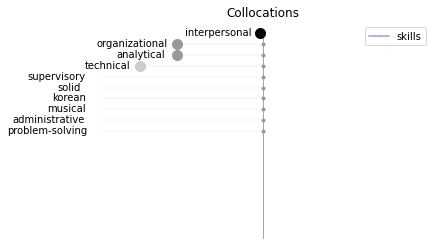

In [51]:
coll.plot_collgraph(node='skills')

## **13. Clusters**

In [61]:
clusters = corpus.clusters('skills',size=2)
clusters.df.head(10)

,N,CLUSTER,FREQUENCY,RANGE,%
0,1,communication skills,24,23,24.21
1,2,skills are,12,11,11.58
2,3,computer skills,11,11,11.58
3,4,skills and,9,9,9.47
4,5,skills including,7,7,7.37
5,6,interpersonal skills,6,6,6.32
6,7,skills to,5,5,5.26
7,8,skills in,5,5,5.26
8,9,skills required,4,4,4.21
9,10,management skills,4,4,4.21


## **14. N-grams**

In [15]:

ngrams = corpus.ngrams(size=2,pos='JJ NN')
ngrams.save_excel('ngrams.xlsx')
ngrams.df.head(10)

,N,N-GRAM,FREQUENCY,RANGE,%
0,1,successful candidate,9,8,8.42
1,2,comprehensive health,8,8,8.42
2,3,competitive salary,7,7,7.37
3,4,ideal candidate,6,5,5.26
4,5,strong computer,5,5,5.26
5,6,high level,5,5,5.26
6,7,strong communication,4,4,4.21
7,8,new business,4,2,2.11
8,9,equivalent experience,4,4,4.21
9,10,verbal communication,4,4,4.21


## **15. Dispersion plot**

In [16]:
dispersion = corpus.dispersion('experience')
dispersion.save_excel('plot.xlsx')
dispersion.df.head(10)


,N,FILENAME,TOTAL,HITS,S1,S2,S3,S4,S5
0,1,ad_069.txt,581,17,3,3,3,4,4
1,2,ad_005.txt,290,9,1,1,0,5,2
2,3,ad_081.txt,396,6,0,0,0,5,1
3,4,ad_065.txt,415,6,1,1,1,2,1
4,5,ad_075.txt,855,5,0,0,0,4,1
5,6,ad_073.txt,334,5,0,0,0,0,5
6,7,ad_074.txt,425,5,1,1,1,0,2
7,8,ad_009.txt,342,5,0,0,1,4,0
8,9,ad_014.txt,315,4,0,0,0,2,2
9,10,ad_043.txt,597,4,2,0,0,0,2
